In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Load dataset 
df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [10]:
# Display dataset basic info
print("Basic Dataset Overview:")
"""displays datatypes, structure and missing values"""
print(df.info()) 

print("\nFirst 5 rows:")
"""displayes first 5 rows"""
print(df.head()) 

Basic Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                             

In [11]:
# Checking for missing values
print("Missing Valuess:")
"""displays the number of missing values in each col."""
print(df.isnull().sum())

Missing Valuess:
VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64


In [12]:
# Display summary of numerical columns
print("Summary\n", df.describe())

Summary
          Postal Code     Model Year  Electric Range      Base MSRP  \
count  112634.000000  112634.000000   112634.000000  112634.000000   
mean    98156.226850    2019.003365       87.812987    1793.439681   
std      2648.733064       2.892364      102.334216   10783.753486   
min      1730.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2017.000000        0.000000       0.000000   
50%     98119.000000    2020.000000       32.000000       0.000000   
75%     98370.000000    2022.000000      208.000000       0.000000   
max     99701.000000    2023.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         112348.000000    1.126340e+05       1.126340e+05  
mean              29.805604    1.994567e+08       5.296650e+10  
std               14.700545    9.398427e+07       1.699104e+09  
min                1.000000    4.777000e+03       1.101001e+09  
25%               18.000000    1.48

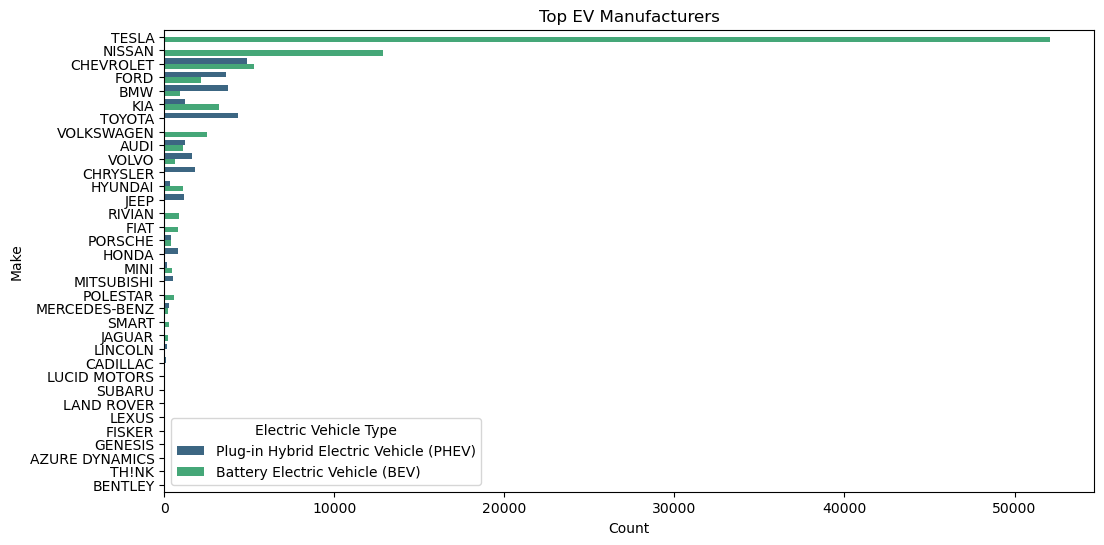

In [14]:
# Count of electric vehicles by make
plt.figure(figsize=(12,6))
"""
sns.countplot makes a bar plot that shows the number of occurances of each unique value in the
'Make' column.
hue parameter differentiates based on 'Electric Vehicle Type'
the y axis represents diff EV manufacturers, order by number of EVs in descending order.
"""
sns.countplot(y=df['Make'], order=df['Make'].value_counts().index, hue=df['Electric Vehicle Type'], palette="viridis")
plt.xlabel("Count")
plt.ylabel("Make")
plt.title("Top EV Manufacturers")
plt.show()

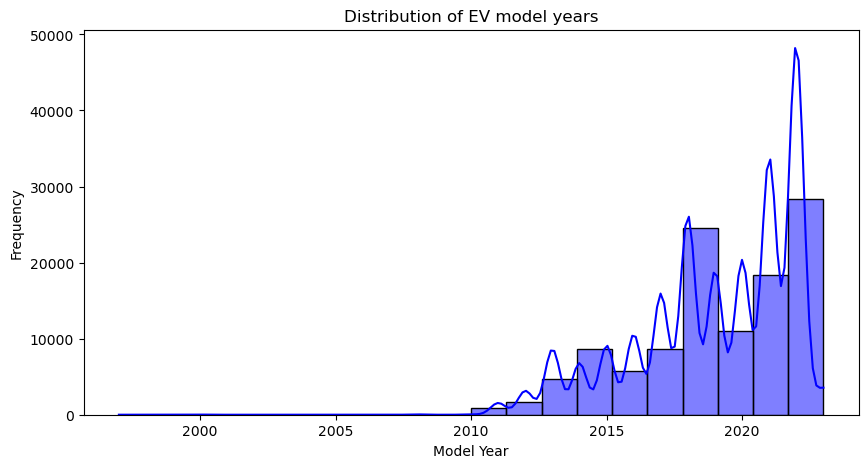

In [19]:
# Distribution oof model years
plt.figure(figsize=(10,5))
"""
sns.histplot creates a histogram that shows the distribution of EVs by model year.
bins parameter defines the number of intervals, kde=True adds a smooth curve to show density.
"""
sns.histplot(df['Model Year'], bins=20, kde=True, color='blue')
plt.xlabel("Model Year")
plt.ylabel("Frequency")
plt.title("Distribution of EV model years")
plt.show()

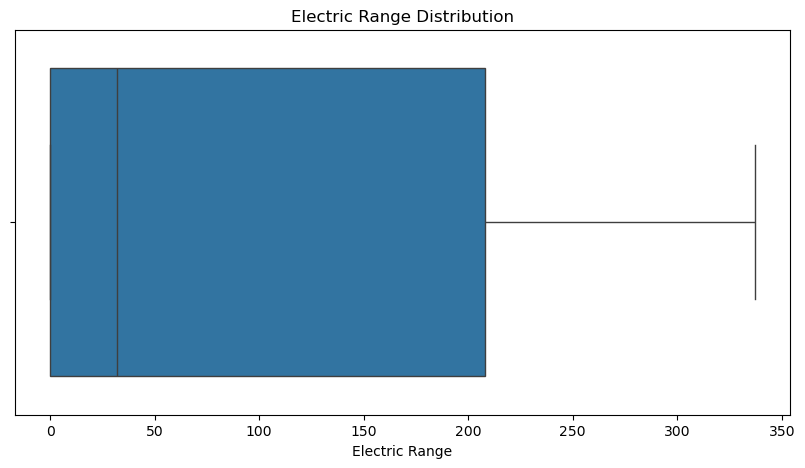

In [20]:
# Electric range analysis using boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Electric Range'])
plt.title("Electric Range Distribution")
plt.show()

C:\Users\arnav\AppData\Local\Temp\ipykernel_32328\2058400071.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=county_counts.index, y=county_counts.values,  palette="coolwarm")


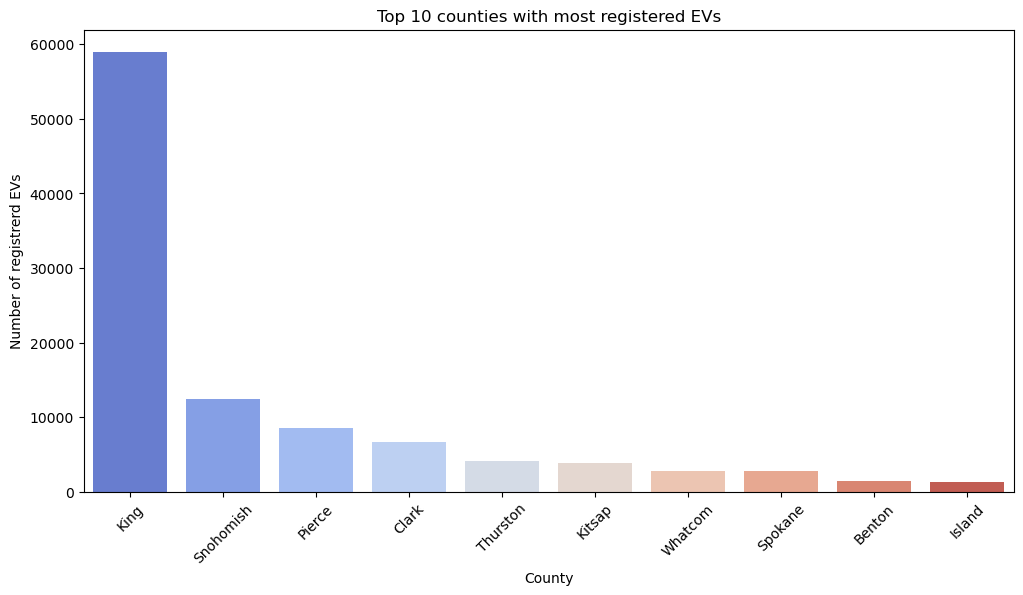

In [29]:
# Group by county to see EV distribution
"""gets the top 10 counties with highest EV registrations"""
county_counts = df['County'].value_counts().head(10)
plt.figure(figsize=(12,6))
"""
sns.barplot creates a bar plot displaying the number of EVs in different counties.
x axis lists counties and y axis shows the nuumber of EVs registered.
"""
sns.barplot(x=county_counts.index, y=county_counts.values,  palette="coolwarm")
"""Rotates county names for readability."""
plt.xticks(rotation=45)
plt.xlabel("County")
plt.ylabel("Number of registrerd EVs")
plt.title("Top 10 counties with most registered EVs")
plt.show()

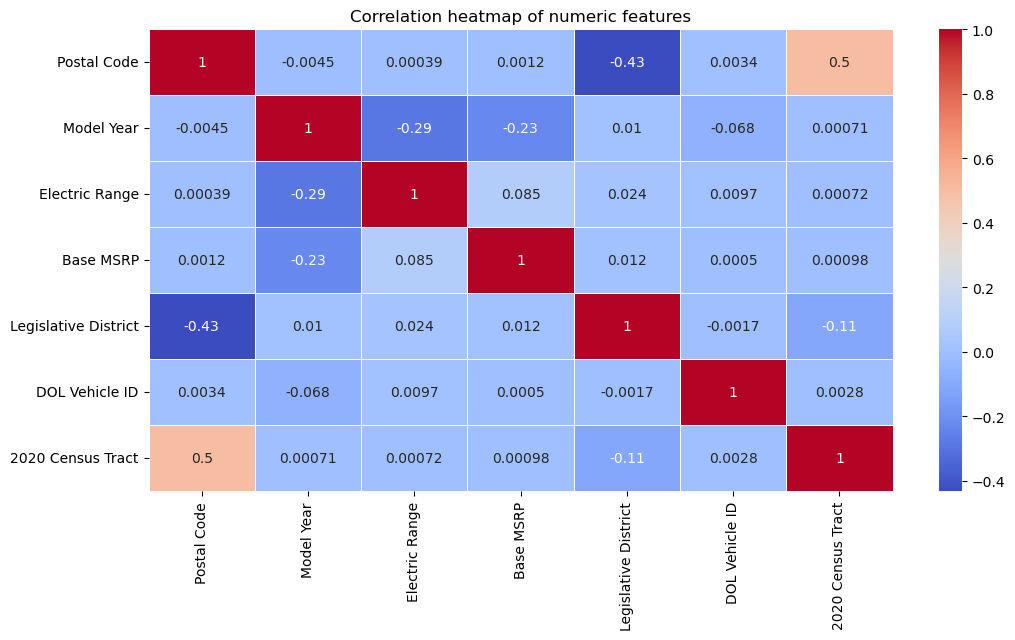

In [33]:
# Correlation heatmat to analyse relationships b/w numeric variables
plt.figure(figsize=(12,6))  
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation heatmap of numeric features")
plt.show()